<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Principal_Component_Analysis_and_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and the possibilty of heart attack**

**Install Pycaret**

In [ ]:
%pip install pycaret==2.3.6


**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (10,7)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.3
Seaborn version:  0.11.0


**Dataset**

The dataset “Health care: Heart Attack Possibilty” used for Principle Component Analysis (PCA) is obtained from Kaggle. This dataset gives the information related to heart disease. Dataset contain 14 columns, target is the class variable which is affected by the other 13 columns. Here the aim is to reduce the number of the columns to the best according to the accuracy metric. 

* Attributes Information
1) age (in years)
2) sex (1 = male; 0 = female)
3) cp: chest pain type (4 values)
    <p>Value 1: typical angina<br>
    Value 2: atypical angina<br>
    Value 3: non-anginal pain<br>
    Value 4: asymptomatic</p>
4) trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5) chol: serum cholestoral (in mg/dl)
6) fbs: fasting blood sugar (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7) restecg: resting electrocardiographic results
    <p>Value 0: normal<br>
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</p>
8) thalach: maximum heart rate achieved
9) exang: exercise induced angina (1 = yes; 0 = no)
10) oldpeak: ST depression induced by exercise relative to rest
11) slope: the slope of the peak exercise ST segment
    <p>Value 0: upsloping<br>
    Value 1: flat<br>
    Value 2: downsloping<p>
12) ca: number of major vessels (0-3) colored by flourosopy
13) thal:  0 = normal; 1 = fixed defect; 2 = reversable defect
14) target(Class): 0= less chance of heart attack 1= more chance of heart attack

* The original dataset can be found on below link:
https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility





In [2]:
#read cvs file into dataframe
df = pd.read_csv('Health care Heart attack possibility.csv')
df.head(25)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   3       145   233    1        0      150      0      2.3   
1    37    1   2       130   250    0        1      187      0      3.5   
2    41    0   1       130   204    0        0      172      0      1.4   
3    56    1   1       120   236    0        1      178      0      0.8   
4    57    0   0       120   354    0        1      163      1      0.6   
5    57    1   0       140   192    0        1      148      0      0.4   
6    56    0   1       140   294    0        0      153      0      1.3   
7    44    1   1       120   263    0        1      173      0      0.0   
8    52    1   2       172   199    1        1      162      0      0.5   
9    57    1   2       150   168    0        1      174      0      1.6   
10   54    1   0       140   239    0        1      160      0      1.2   
11   48    0   2       130   275    0        1      139      0      0.2   
12   49    1   1       130   266    0        1      171      0      0.6   
13   64    1   3       110   211    0        0      144      1      1.8   
14   58    0   3       150   283    1        0      162      0      1.0   
15   50    0   2       120   219    0        1      158      0      1.6   
16   58    0   2       120   340    0        1      172      0      0.0   
17   66    0   3       150   226    0        1      114      0      2.6   
18   43    1   0       150   247    0        1      171      0      1.5   
19   69    0   3       140   239    0        1      151      0      1.8   
20   59    1   0       135   234    0        1      161      0      0.5   
21   44    1   2       130   233    0        1      179      1      0.4   
22   42    1   0       140   226    0        1      178      0      0.0   
23   61    1   2       150   243    1        1      137      1      1.0   
24   40    1   3       140   199    0        1      178      1      1.4   

    slope  ca  thal  Class  
0       0   0     1      1  
1       0   0     2      1  
2       2   0     2      1  
3       2   0     2      1  
4       2   0     2      1  
5       1   0     1      1  
6       1   0     2      1  
7       2   0     3      1  
8       2   0     3      1  
9       2   0     2      1  
10      2   0     2      1  
11      2   0     2      1  
12      2   0     2      1  
13      1   0     2      1  
14      2   0     2      1  
15      1   0     2      1  
16      2   0     2      1  
17      0   0     2      1  
18      2   0     2      1  
19      2   2     2      1  
20      1   0     3      1  
21      2   0     2      1  
22      2   0     2      1  
23      1   0     2      1  
24      2   0     3      1

In [47]:
len(df.index)

303

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  Class     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [49]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  1


In [50]:
# Drop dublicates
df.drop_duplicates(inplace=True)

In [51]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

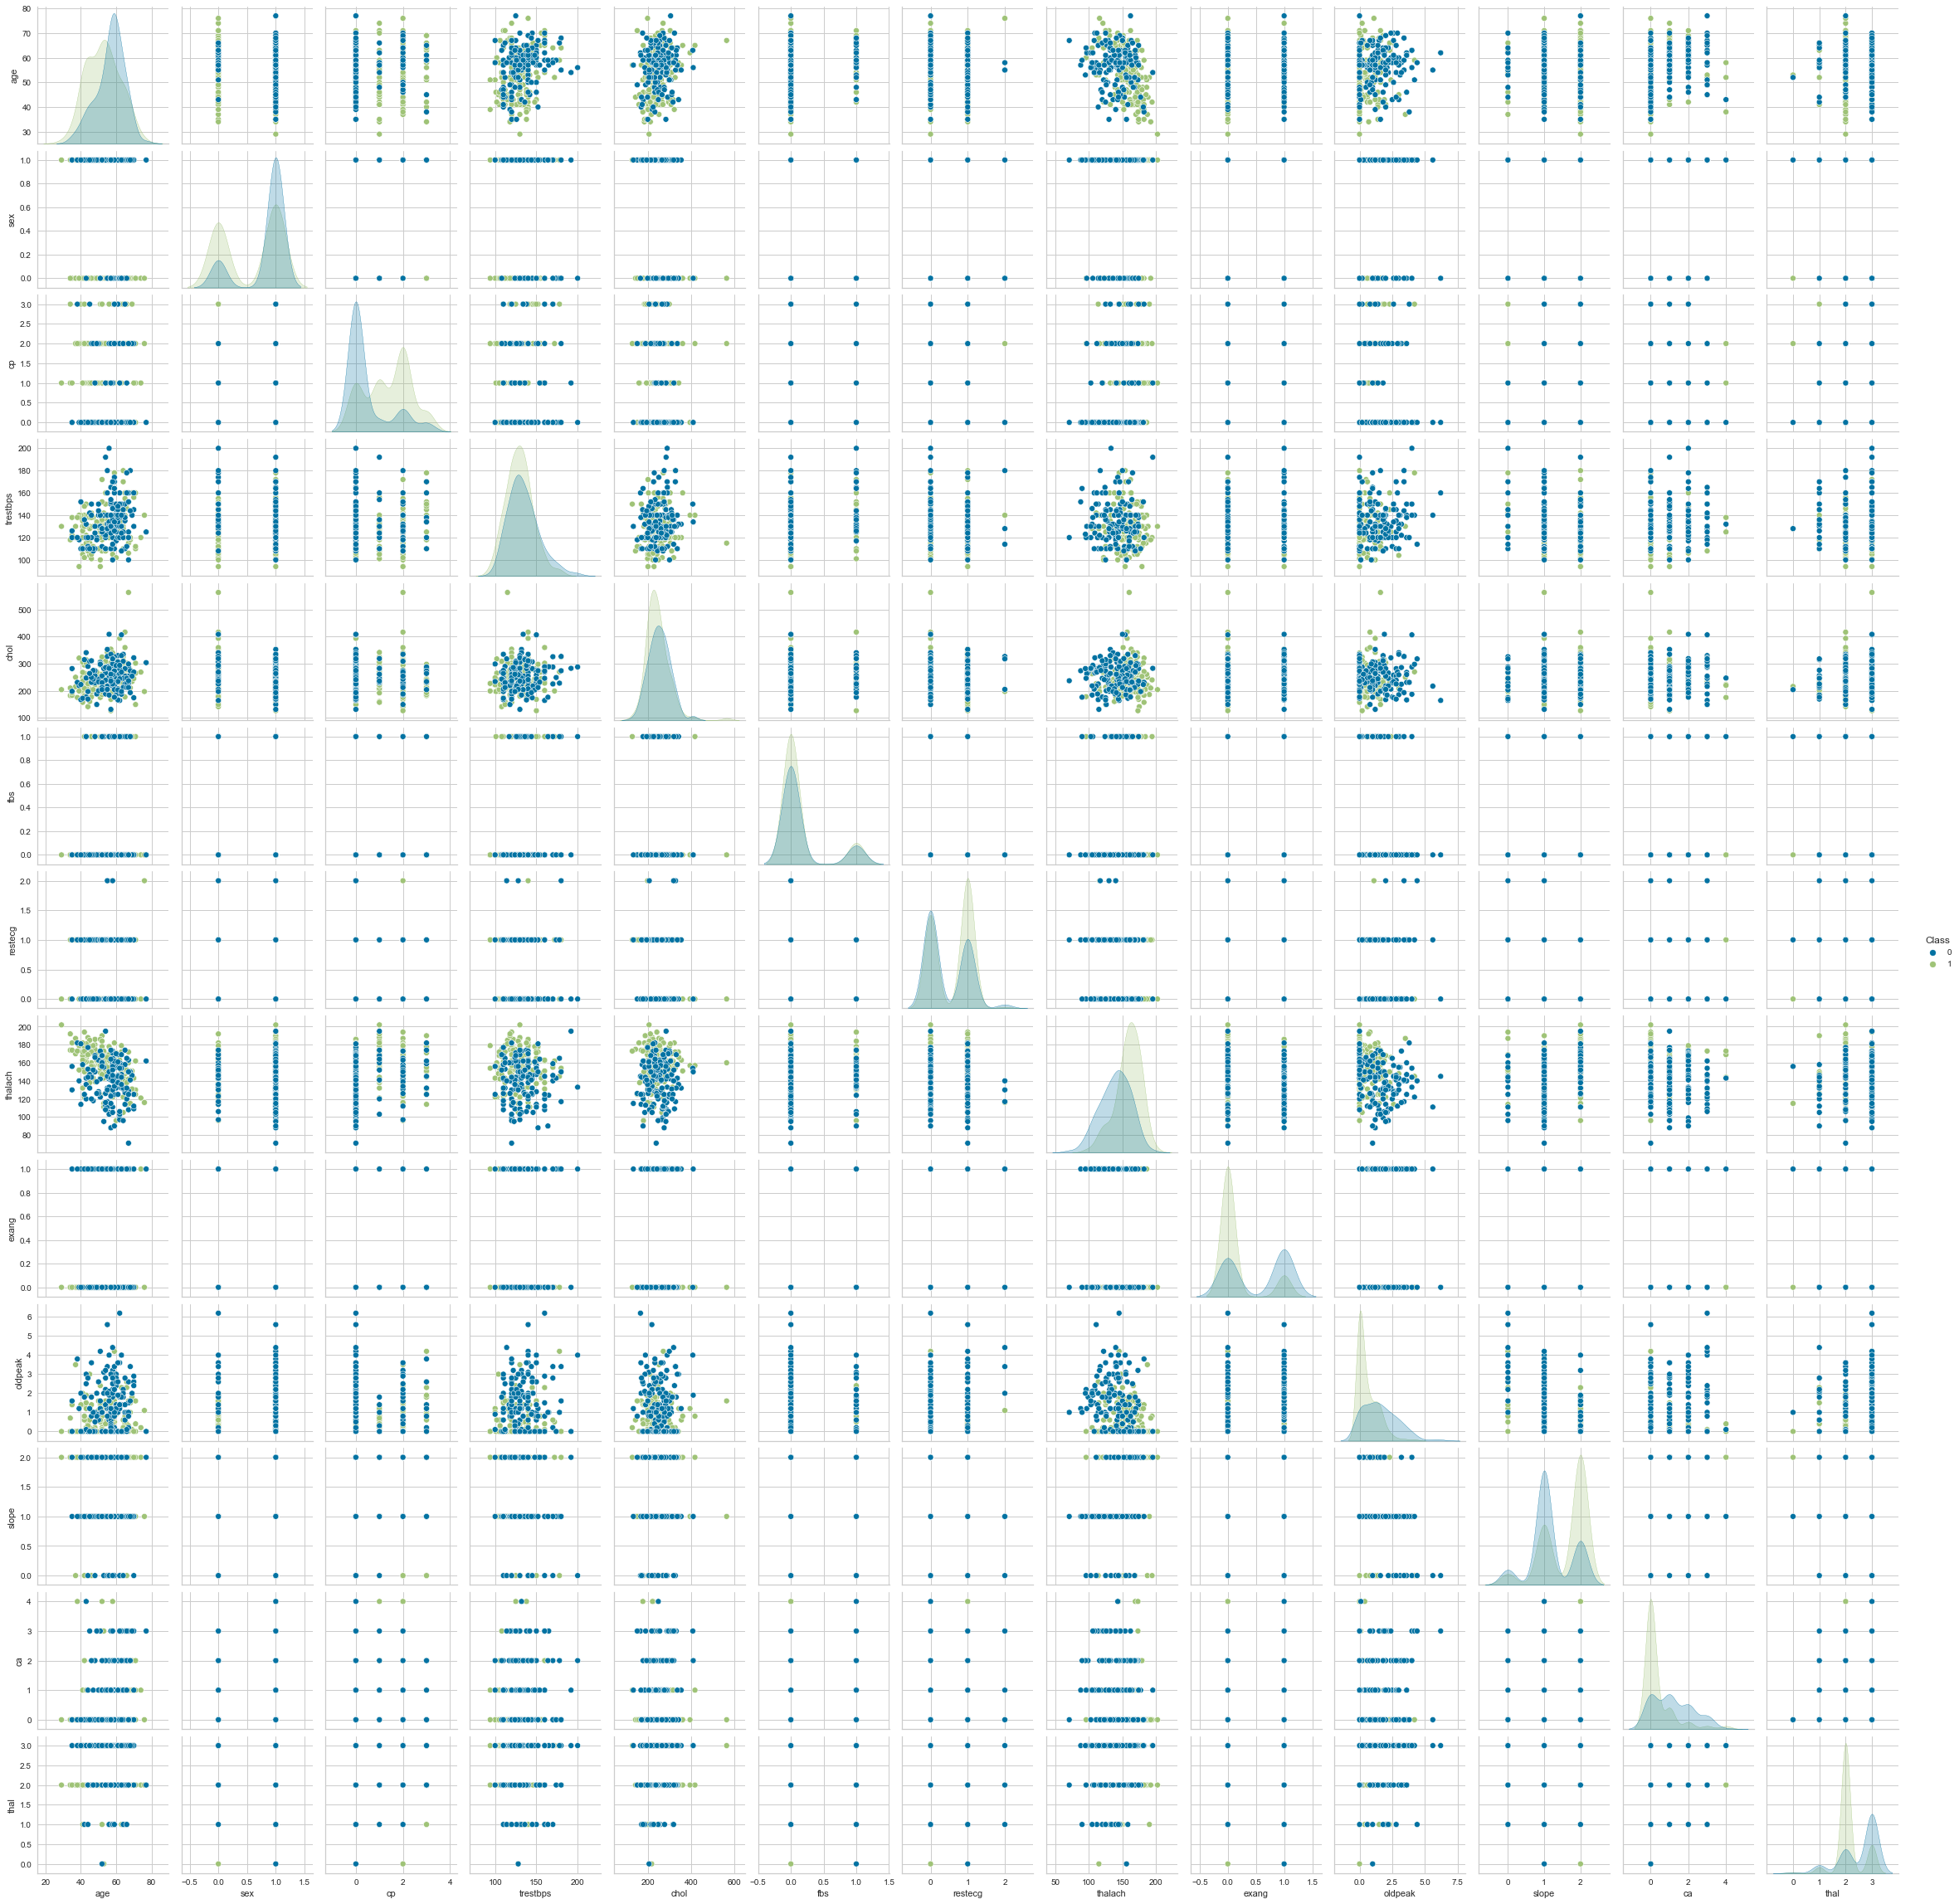

In [52]:
sns.pairplot(df, hue='Class')
plt.show()

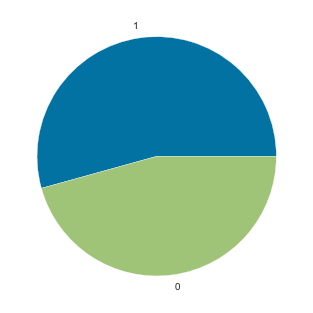

In [53]:
# Plotting a pie chart to give a visual representation of the proportion
# of each category in our data.
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [54]:
# Separating features and target 
X = df.drop(columns=['Class'])
X.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
5   0     1  
6   0     2  
7   0     3  
8   0     3  
9   0     2

In [55]:
X.describe().transpose()

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trestbps  302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalach   302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exang     302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
slope     302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0
ca        302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thal      302.0    2.314570   0.613026    0.0    2.00    2.0    3.00    3.0

**Standardize the Data**

In [56]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.949794  0.682656  1.976470  0.764066 -0.261285  2.389793 -1.002541   
1 -1.928548  0.682656  1.005911 -0.091401  0.067741 -0.418446  0.901657   
2 -1.485726 -1.464866  0.035352 -0.091401 -0.822564 -0.418446 -1.002541   
3  0.174856  0.682656  0.035352 -0.661712 -0.203222 -0.418446  0.901657   
4  0.285561 -1.464866 -0.935208 -0.661712  2.080602 -0.418446  0.901657   
5  0.285561  0.682656 -0.935208  0.478910 -1.054817 -0.418446  0.901657   
6  0.174856 -1.464866  0.035352  0.478910  0.919336 -0.418446 -1.002541   
7 -1.153610  0.682656  0.035352 -0.661712  0.319348 -0.418446  0.901657   
8 -0.267966  0.682656  1.005911  2.303906 -0.919336  2.389793  0.901657   
9  0.285561  0.682656  1.005911  1.049221 -1.519323 -0.418446  0.901657   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.018826 -0.698344  1.084022 -2.271182 -0.714911 -2.147955  
1  1.636979 -0.698344  2.118926 -2.271182 -0.714911 -0.513994  
2  0.980971 -0.698344  0.307844  0.979514 -0.714911 -0.513994  
3  1.243374 -0.698344 -0.209608  0.979514 -0.714911 -0.513994  
4  0.587366  1.431958 -0.382092  0.979514 -0.714911 -0.513994  
5 -0.068642 -0.698344 -0.554576 -0.645834 -0.714911 -2.147955  
6  0.150027 -0.698344  0.221602 -0.645834 -0.714911 -0.513994  
7  1.024705 -0.698344 -0.899544  0.979514 -0.714911  1.119967  
8  0.543632 -0.698344 -0.468334  0.979514 -0.714911  1.119967  
9  1.068439 -0.698344  0.480328  0.979514 -0.714911 -0.513994

**Observations and variables**

In [57]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

[Text(0, 0, 'age'),
 Text(0, 0, 'sex'),
 Text(0, 0, 'cp'),
 Text(0, 0, 'trestbps'),
 Text(0, 0, 'chol'),
 Text(0, 0, 'fbs'),
 Text(0, 0, 'restecg'),
 Text(0, 0, 'thalach'),
 Text(0, 0, 'exang'),
 Text(0, 0, 'oldpeak'),
 Text(0, 0, 'slope'),
 Text(0, 0, 'ca'),
 Text(0, 0, 'thal')]

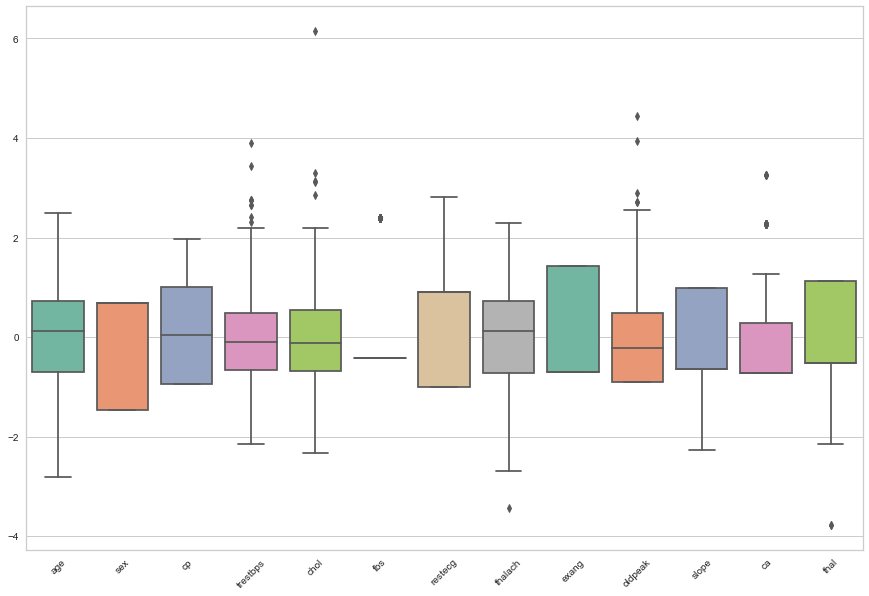

In [58]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

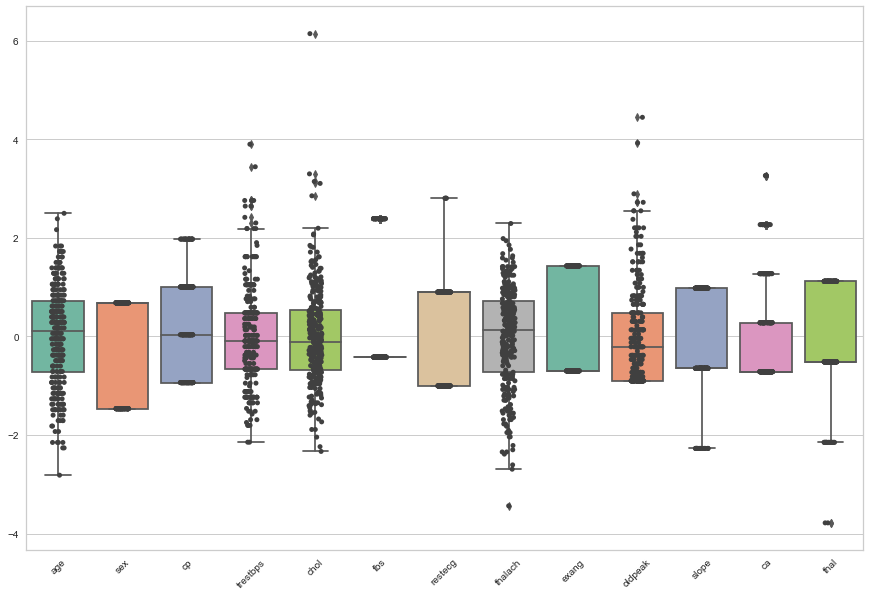

In [59]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

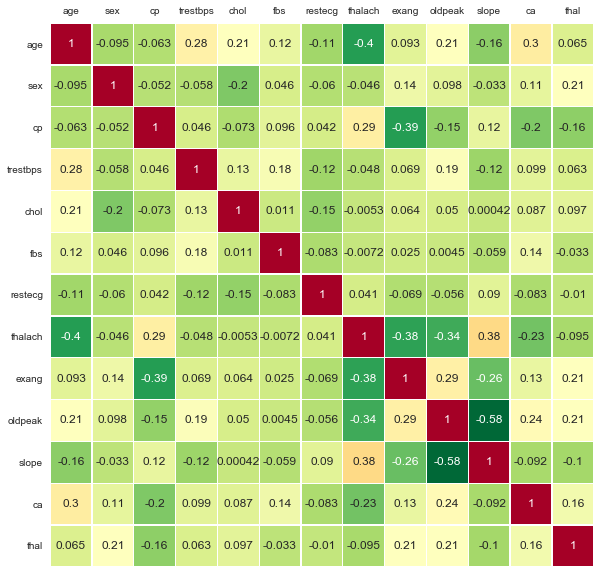

In [60]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

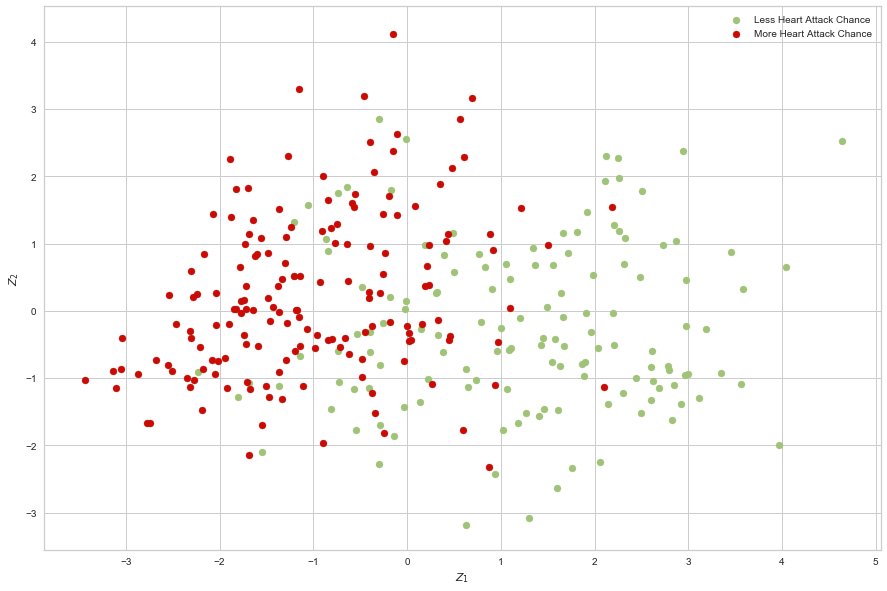

In [61]:
pca = PCA()
Z = pca.fit_transform(X)

# (More Possibility)->1,  (Less Possibility)->0

idx_Less_Chance= np.where(y == 0)
idx_More_Chance = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Less_Chance,0], Z[idx_Less_Chance,1], c='g', label='Less Heart Attack Chance')
plt.scatter(Z[idx_More_Chance,0], Z[idx_More_Chance,1], c='r', label='More Heart Attack Chance')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

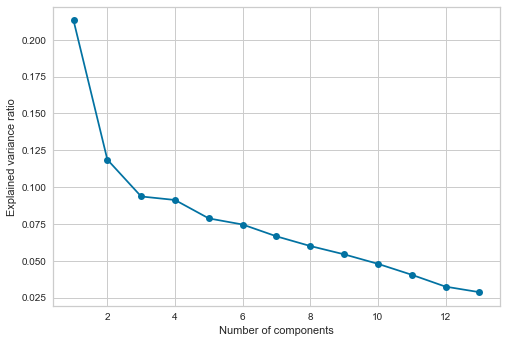

In [62]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

**Eigenvectors**

array([[ 0.3132666 ,  0.40784766,  0.10263543, -0.00284966, -0.30525457,
        -0.14790741, -0.2291864 , -0.28093616, -0.33996909, -0.02241176,
        -0.13384231,  0.56702444,  0.15153198],
       [ 0.09392164, -0.3710019 , -0.52341474, -0.33121828,  0.02292887,
         0.03759732, -0.16887733, -0.18293188, -0.18698562,  0.53865636,
        -0.27797776, -0.00107656,  0.05964707],
       [-0.2725298 ,  0.2989378 , -0.39173603,  0.24086648,  0.15767805,
        -0.19227814, -0.22614896,  0.03830043, -0.37639917,  0.13602721,
         0.57967305, -0.11810856,  0.01720979],
       [ 0.18487583,  0.43718082, -0.19833766,  0.01076673,  0.20890007,
        -0.16126354,  0.35088001, -0.58024769,  0.35219051,  0.08589705,
        -0.05844032, -0.26421238,  0.03392443],
       [ 0.11382658,  0.3621942 ,  0.44211275, -0.2845592 ,  0.34277072,
        -0.08364325,  0.04907187,  0.36689211, -0.2036778 ,  0.48171706,
        -0.12242399, -0.17138896, -0.00420057],
       [ 0.07401622,  0.318404

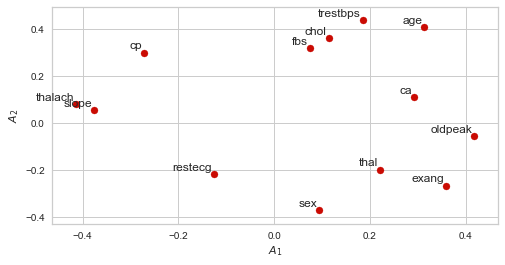

In [63]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

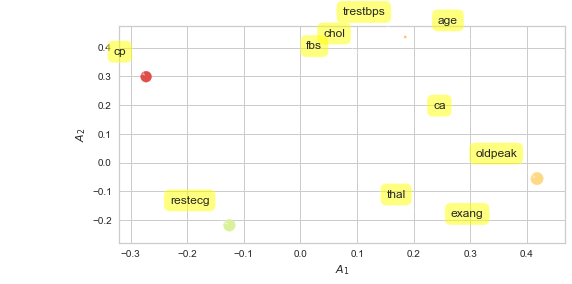

In [64]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([2.77995747, 1.54685423, 1.22081887, 1.18968262, 1.02654347,
       0.97249814, 0.86792385, 0.78211316, 0.7085762 , 0.62450065,
       0.52761452, 0.42252727, 0.37357891])

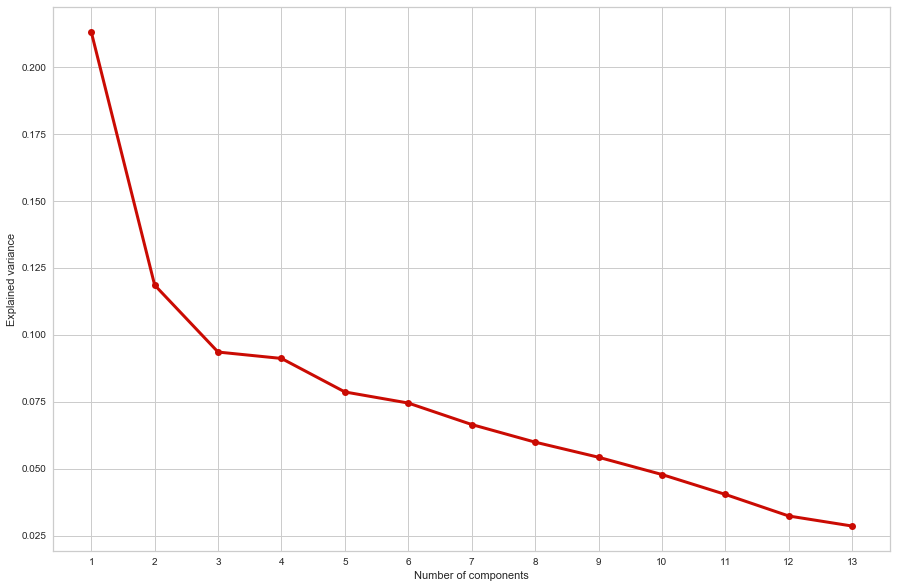

In [65]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

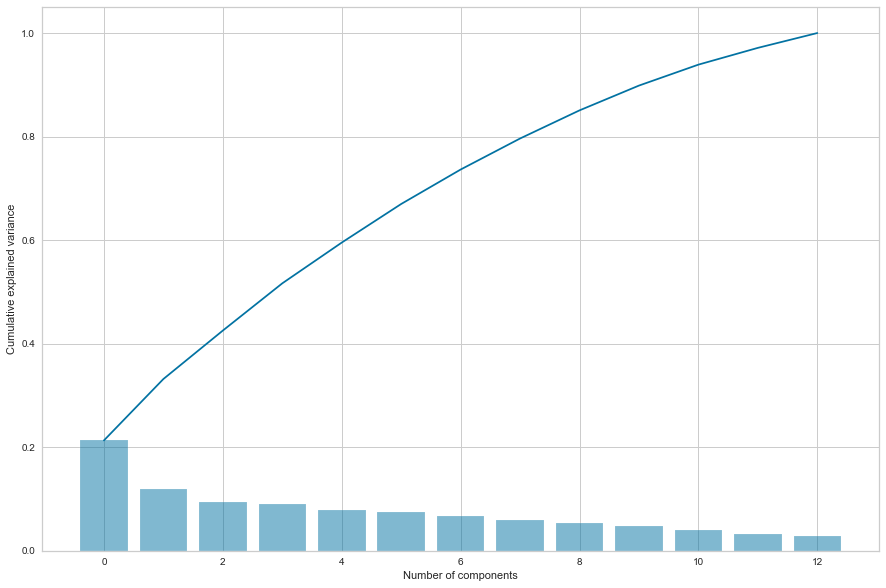

In [66]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([ 2.29191381, -0.98841636,  0.02055853, -0.49003964,  0.2786926 ,
       -0.39748233,  1.42589369, -1.14555467,  1.18480417,  0.0638123 ,
       -0.43371648,  0.64943798, -0.36155923, -0.3819523 ,  3.29895853,
        0.00763187,  1.43357146,  1.52363315, -0.6005594 ,  2.07114928,
       -0.74409558, -1.05741314, -0.94513329,  0.90582752, -1.31257781,
        2.62790142,  1.29662021, -1.28736535,  4.11748312,  0.66015453,
       -0.89708482, -1.22633536, -0.41146663,  0.36363475, -0.42832586,
       -0.14253216,  2.26168405,  0.437569  ,  2.0011304 ,  3.19059454,
        1.74032096, -0.17635721, -2.32461886,  0.54874904,  0.59606232,
       -0.03900701,  0.2118819 ,  0.36685498,  1.40062776,  0.7071296 ,
        1.08885218,  0.38430862,  0.04201792, -1.00091291,  1.83271329,
       -0.52702215, -0.70650234, -0.75363789, -0.8907571 ,  1.22917334,
        2.5180313 , -0.73086862,  0.24063023, -0.91457197,  1.51688657,
       -0.86916343, -1.8221346 ,  0.37084035, -1.13369141,  0.18

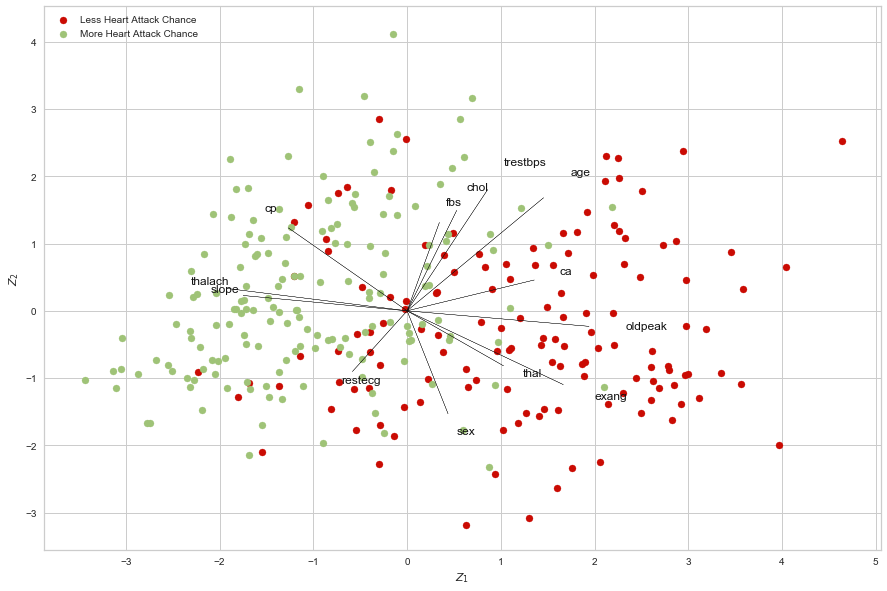

In [67]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Less_Chance,0], Z[idx_Less_Chance,1], c='r', label='Less Heart Attack Chance')
plt.scatter(Z[idx_More_Chance,0], Z[idx_More_Chance,1], c='g', label='More Heart Attack Chance')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [ ]:
%pip install pca

In [68]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [69]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.603024  2.291914 -2.847153  2.335876  0.211676  1.676809 -0.138555   
1   -0.478588 -0.988416 -1.492667  2.239502  2.282194 -0.673716 -0.107029   
2   -1.847655  0.020559  0.353252  0.448107  0.852136  0.843831 -0.075655   
3   -1.724377 -0.490040 -0.026776 -0.134268 -0.248690 -0.542398 -0.169122   
4   -0.403288  0.278693  2.901997 -0.433701  0.110159 -0.053437  1.427634   
..        ...       ...       ...       ...       ...       ...       ...   
297  1.112720 -0.550608  1.637427  0.576338 -0.103074 -0.513229  1.554413   
298 -0.727607 -1.055103 -0.699288  0.820136  0.888040 -1.225068 -0.773510   
299  2.483185  0.504001 -2.158561 -0.012219 -1.355572 -1.339190  0.497217   
300  1.762062 -2.333697 -0.495944  0.466524 -1.201548 -0.440850  0.430330   
301 -0.860915  1.062696  0.648177  0.316332  0.224226  0.650065 -0.722679   

          PC8       PC9      PC10      PC11      PC12  
0    0.731153 -0.688440  0.916149 -0.566152  0.464262  
1    1.593495  1.161419  1.218927 -0.403685  0.230371  
2   -0.020138  1.307607 -1.100575  0.413551  0.094931  
3   -0.185395 -0.069198  0.735677 -0.617607  1.076788  
4    0.611923 -0.332278  0.870162  0.428224  0.890046  
..        ...       ...       ...       ...       ...  
297 -0.727569 -0.632263 -1.197476  0.326712 -0.469778  
298  0.981507 -1.781572  0.199964  0.345526 -1.166190  
299  0.709531  0.466189 -0.834969 -1.378941  0.915437  
300 -1.187794 -0.252502 -0.973383  0.354553 -0.077576  
301  0.180188  0.825907 -1.029035  0.089921  0.349907  

[302 rows x 12 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [302] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [302] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fce6ba81d00>)

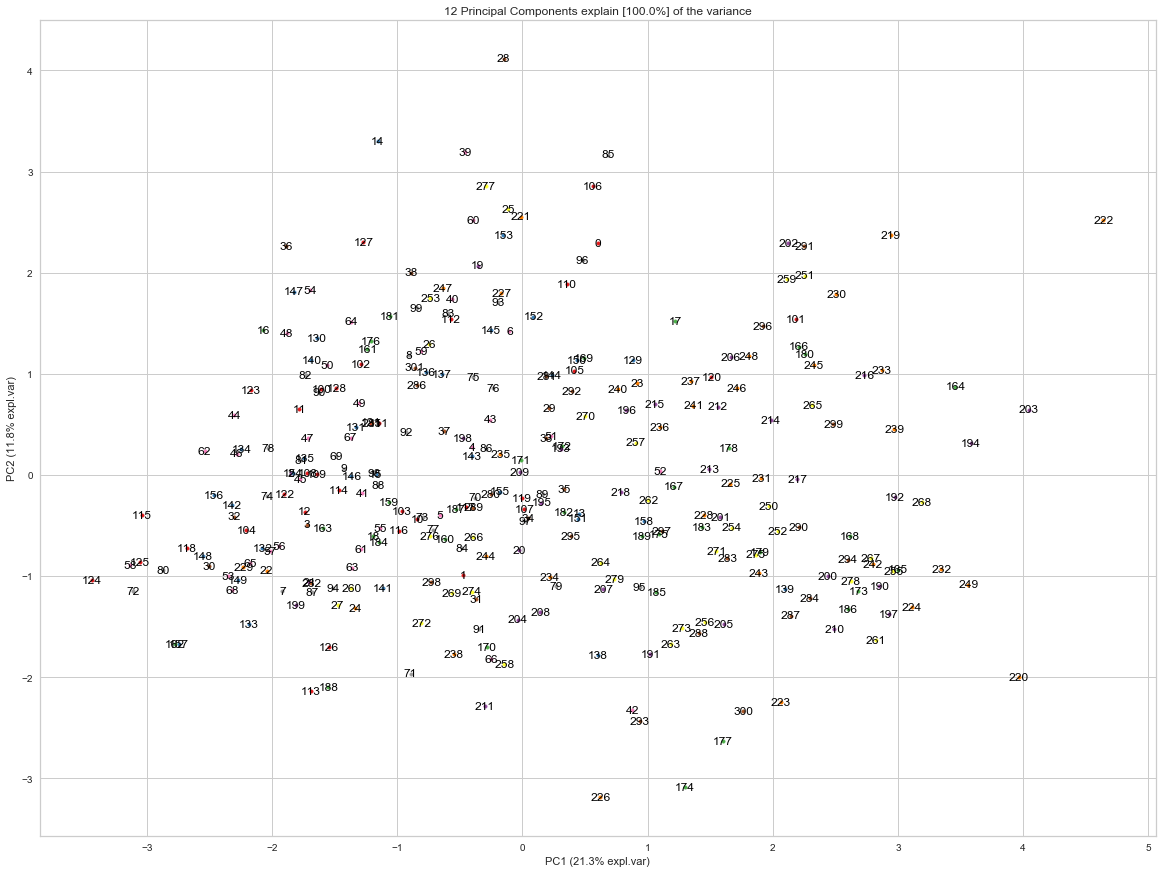

In [70]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [71]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5       PC6  \
age       0.313267  0.407848  0.102635 -0.002850 -0.305255 -0.147907   
sex       0.093922 -0.371002 -0.523415 -0.331218  0.022929  0.037597   
cp       -0.272530  0.298938 -0.391736  0.240866  0.157678 -0.192278   
trestbps  0.184876  0.437181 -0.198338  0.010767  0.208900 -0.161264   
chol      0.113827  0.362194  0.442113 -0.284559  0.342771 -0.083643   
fbs       0.074016  0.318404 -0.472856 -0.131263 -0.264711  0.213977   
restecg  -0.125403 -0.218611  0.075883  0.278718 -0.360776 -0.689290   
thalach  -0.414481  0.080825 -0.139541 -0.205140  0.324579 -0.107287   
exang     0.358532 -0.266081  0.134093 -0.097502  0.032789  0.231757   
oldpeak   0.417687 -0.055946 -0.152224  0.310886  0.259932 -0.153003   
slope    -0.376377  0.055267  0.143693 -0.480451 -0.243253 -0.079161   
ca        0.291653  0.111171 -0.099229 -0.339803 -0.411511 -0.184925   
thal      0.221150 -0.198230 -0.082307 -0.402154  0.342877 -0.506690   

               PC7       PC8       PC9      PC10      PC11      PC12  
age      -0.229186 -0.280936 -0.339969 -0.022412 -0.133842  0.567024  
sex      -0.168877 -0.182932 -0.186986  0.538656 -0.277978 -0.001077  
cp       -0.226149  0.038300 -0.376399  0.136027  0.579673 -0.118109  
trestbps  0.350880 -0.580248  0.352191  0.085897 -0.058440 -0.264212  
chol      0.049072  0.366892 -0.203678  0.481717 -0.122424 -0.171389  
fbs       0.500856  0.432544 -0.177446 -0.158857 -0.152092  0.031991  
restecg   0.385609  0.103836 -0.032363  0.272442 -0.085189 -0.001542  
thalach   0.100284  0.155208  0.379822  0.049805  0.010388  0.612598  
exang     0.457234 -0.107587 -0.111443  0.178279  0.617762  0.225362  
oldpeak  -0.113849  0.198073  0.235266  0.124688  0.019237  0.308758  
slope     0.057916 -0.264556 -0.011644  0.057025  0.188449  0.092920  
ca       -0.325202  0.267646  0.480970  0.052029  0.319495 -0.173882  
thal      0.039274  0.021182 -0.257336 -0.544228  0.017445 -0.063712

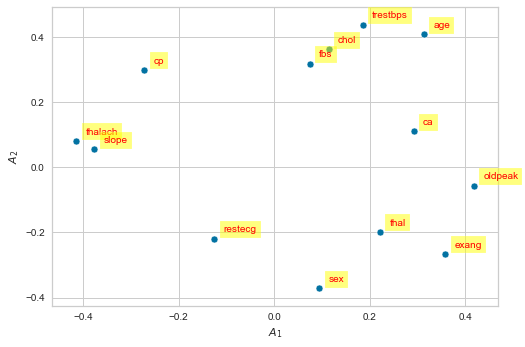

In [72]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

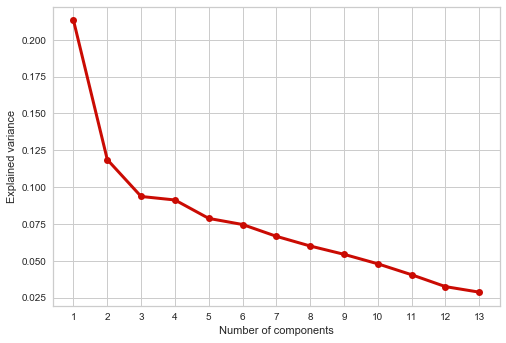

In [73]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

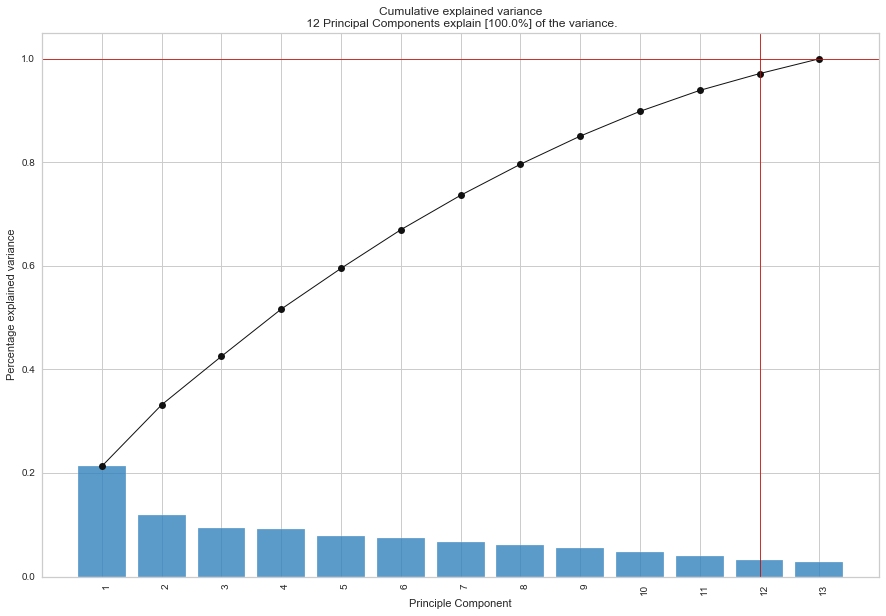

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fce64c74340>)

<Figure size 576x396 with 0 Axes>

In [74]:
model.plot()

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [302] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [302] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fce64c09310>)

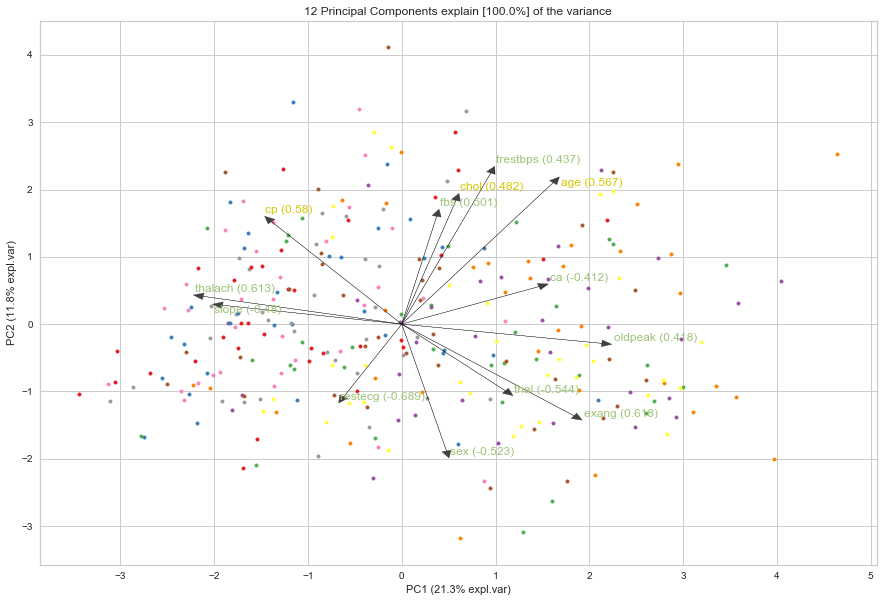

In [75]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [302] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [302] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fce6a645eb0>)

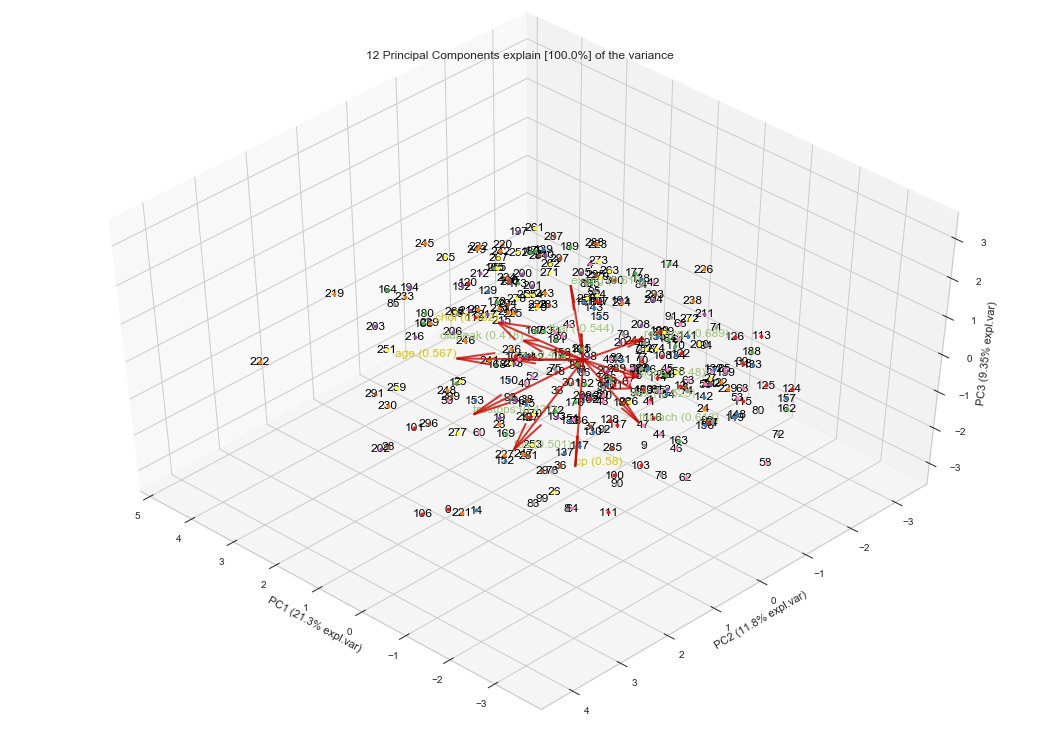

In [76]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

In [3]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (273, 14)
Unseen Data For Predictions: (30, 14)


In [4]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, n_jobs=4, session_id=123)

**Comparing All Models**

In [7]:
#show the best model and their statistics
best_model = compare_models()

In [8]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Create a Model 

**Logistic Regresssion**

In [9]:
lr = create_model('lr')

**Tune the model**

In [10]:
tuned_lr=tune_model(lr)

In [11]:
tuned_lr

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [13]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with K-nearest neighbour**

In [14]:
knn = create_model('knn')

**Tune model with K-nearest neighbour**

In [15]:
tuned_knn = tune_model(knn)

In [16]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=4, n_neighbors=16, p=2,
                     weights='uniform')

**Evaluate model with K-nearest neighbour**

In [17]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Quadratic Discriminant Analysis**

In [18]:
qda=create_model('qda')

**Tune QDA Model**

In [19]:
tuned_qda=tune_model(qda)

**Evaluate QDA Model**

In [20]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [21]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
%pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /Users/mohammadkhaled/opt/anaconda3/lib/python3.8/site-packages (0.13.5)
Note: you may need to restart the kernel to use updated packages.


# **Classification + PCA**

In [5]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 8)

# **Comparing Models**

In [6]:
#show the best model and their statistics
best_model_pca = compare_models()

# **Best model with PCA**

In [7]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Tune Best Model**

In [8]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

# **Evaluate Best Model**

In [9]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [10]:
lr_pca = create_model('lr')

# **Tune Model**

In [11]:
tuned_lr_pca = tune_model(lr_pca)

# **Evaluate Model**

In [12]:
tuned_lr_pca

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create K-nearest neighbour Model**

In [14]:
knn_pca = create_model('knn')

# **Tune Model**

In [15]:
tuned_knn_pca = tune_model(knn_pca)

In [16]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

# **Evaluate Model KNN**

In [17]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Quadratic Discriminant Analysis Model**

In [18]:
qda_pca = create_model('qda')

# **Tune model**

In [19]:
tuned_qda_pca = tune_model(qda_pca)

# **Evaluate Model**

In [20]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001)

In [21]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [22]:
et_pca = create_model('et')

In [39]:
tuned_et_pca = tune_model(et_pca)

In [40]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [41]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [42]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [43]:
import shap

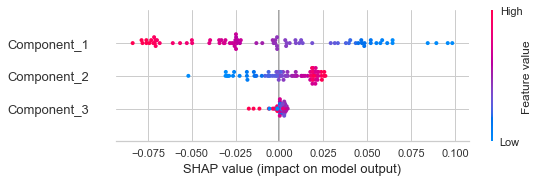

In [44]:
interpret_model(tuned_et_pca, plot='summary')


In [45]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [46]:
interpret_model(tuned_et_pca, plot='reason')